In [21]:
import os
import numpy as np
import scipy.io as spio
import scipy.interpolate as spin
from scipy.linalg import expm, logm
import matplotlib.pyplot as plt

In [15]:
XYZ = []
SPD = []
UQ = []
for i in range(7):
    useddata = spio.loadmat("D:/Pytorch/iflow/iflow/data/Robot_data/mantrack/"+ 'manTrack{}.mat'.format(i+1), squeeze_me=True)
    pos = useddata["xt"].transpose()
    # print(useddata["Me_track"][:,:,0])
    spd = useddata["Me_track"].reshape((9,4000)).transpose().reshape((4000,3,3))
    # print(spd[0,:,:])
    uq = useddata["qt"].transpose()
    XYZ.append(pos)
    SPD.append(spd)
    UQ.append(uq)
print(SPD[0][0,:,:])
print(SPD[0][-1,:,:])
print(XYZ[0][-1,:])
print(XYZ[1][-1,:])

[[ 0.4405727   0.2373188  -0.16842857]
 [ 0.2373188   0.33246353  0.05933143]
 [-0.16842857  0.05933143  0.29716317]]
[[ 0.07821511  0.05289024  0.13068634]
 [ 0.05289024  0.81636699 -0.01347618]
 [ 0.13068634 -0.01347618  0.66995896]]
[ 0.67375726 -0.04542656  0.32224979]
[ 0.67375726 -0.04542656  0.32224979]


In [3]:
print(len(SPD))
print(SPD[0].shape)

7
(4000, 3, 3)


In [4]:
def Log_map(U):
    P = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    m = P @ logm(P @ U @ P) @ P
    return m

def sym_to_vec(M):
    vec = np.zeros(6)
    vec[0] = M[0,0]
    vec[1] = M[1,1]
    vec[2] = M[2,2]
    vec[3] = np.sqrt(2)*M[1,2]
    vec[4] = np.sqrt(2)*M[0,2]
    vec[5] = np.sqrt(2)*M[0,1]
    return vec

print(SPD[0][0,:,:])
print(Log_map(SPD[0][0,:,:]))

Joint_vector = []
for i in range(len(SPD)):
    joi_vec = np.zeros((SPD[0].shape[0],6))
    for j in range(SPD[0].shape[0]):
        # SPD[i][j,:,:] = Log_map(SPD[i][j,:,:])
        joi_vec[j,:] = sym_to_vec(Log_map(SPD[i][j,:,:]))
    Joint_vector.append(joi_vec)

print(Joint_vector[0].shape)


[[ 0.4405727   0.2373188  -0.16842857]
 [ 0.2373188   0.33246353  0.05933143]
 [-0.16842857  0.05933143  0.29716317]]
[[-1.35583554  0.98551068 -0.79397781]
 [ 0.98551068 -1.58986179  0.58251254]
 [-0.79397781  0.58251254 -1.55826301]]
(4000, 6)


In [11]:
## seperate joint vector
print(Joint_vector[0][0,:])
np_Joint_vector = np.array(Joint_vector)
print(np_Joint_vector.shape)
np.save(os.getcwd() + "/../data/robot_data/man_trial/joint_vector6.npy", np_Joint_vector)

[-1.35583554 -1.58986179 -1.55826301  0.82379714 -1.12285418  1.39372258]
(7, 4000, 6)


In [12]:
## seperate position data
print(len(XYZ))
print(XYZ[0].shape)
np_XYZ = np.array(XYZ)
print(np_XYZ.shape)
np.save(os.getcwd() + "/../data/robot_data/man_trial/pos3.npy", np_XYZ)
print(np_XYZ[0,-1,:])

7
(4000, 3)
(7, 4000, 3)
[ 0.67375726 -0.04542656  0.32224979]


In [87]:
## joint SPD and position together
Joi_vec_pos = []
for i in range(len(SPD)):
    joi_vec_pos = np.zeros((SPD[0].shape[0],9))
    joi_vec_pos[:,:6] = Joint_vector[i]
    joi_vec_pos[:,6:] = XYZ[i]
    Joi_vec_pos.append(joi_vec_pos)
Joi_vec_pos = np.array(Joi_vec_pos)
print(Joi_vec_pos.shape)
print(Joi_vec_pos[0,0,:])
np.save(os.getcwd() + "/../data/robot_data/joi_vec_pos9.npy", Joi_vec_pos)

(7, 4000, 9)
[-1.35583554 -1.58986179 -1.55826301  0.82379714 -1.12285418  1.39372258
  0.24420445 -0.32554086  0.80790596]


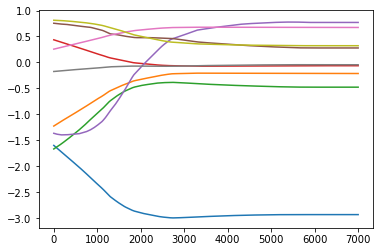

(7001, 9)
(7001, 3, 3)
(7001, 3)
[[ 0.32834052  0.12020691 -0.21079131]
 [ 0.12020691  0.33423408  0.02413437]
 [-0.21079131  0.02413437  0.28837893]]
[[ 0.07843997  0.05296467  0.13100098]
 [ 0.05296467  0.8158087  -0.0134405 ]
 [ 0.13100098 -0.0134405   0.66929635]]
[ 0.67382931 -0.04462663  0.32228924]


In [98]:
def vec_to_sym(vec):
    M = np.zeros((3,3))
    M[0,0] = vec[0]
    M[1,1] = vec[1]
    M[2,2] = vec[2]
    M[1,2] = M[2,1] = vec[3]/np.sqrt(2)
    M[0,2] = M[2,0] = vec[4]/np.sqrt(2)
    M[0,1] = M[1,0] = vec[5]/np.sqrt(2)
    return M

def Exp_map(M):
    P = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    m = P @ expm(P @ M @ P) @ P
    return m

joint_vec_pos9 = np.load("D:/Pytorch/iflow/iflow/data/Robot_data/generated/joi_vec_pos9.npy")
for i in range(joint_vec_pos9.shape[-1]):
    plt.plot(joint_vec_pos9[:,i])
plt.show()
print(joint_vec_pos9.shape)
vec6 = joint_vec_pos9[:,:6]
pos3 = joint_vec_pos9[:,6:]
gene_spd = np.zeros((vec6.shape[0],3,3))
for i in range(vec6.shape[0]):
    gene_spd[i,:,:] = Exp_map(vec_to_sym(vec6[i,:]))
print(gene_spd.shape)
print(pos3.shape)
print(gene_spd[0,:,:])
print(gene_spd[-1,:,:])
print(pos3[-1,:])
POS3 = pos3.transpose()
Gene_SPD = gene_spd.reshape((7001, 9)).transpose().reshape((3,3,7001))
spio.savemat("generated_spd_pos.mat", {"Me_track":Gene_SPD, "xt":POS3})

In [56]:
def R_Exp(R):
    uqs = np.zeros((R.shape[0],4))
    nR = np.linalg.norm(R,axis = 1)
    uqs[:,0] = np.cos(nR)
    uqs[:,1:] = R * np.sin(nR).reshape(R.shape[0],1)/nR.reshape(R.shape[0],1)
    return uqs

def quat_prod(q1,q2):
    p = np.zeros(4)
    p[0] = q1[0] * q2[0] - q1[1:] @ q2[1:]
    p[1:] = q1[0] * q2[1:] + q2[0] * q1[1:] + np.cross(q1[1:],q2[1:])
    return p
##generated uqs check
ori_vec = np.loadtxt("D:/matlab/SPD_plot/dmp-spd-master/spl_ori.txt")
print(ori_vec.shape)
ori_uq = R_Exp(ori_vec)
print(ori_uq.shape)

count = 0
for i in range(ori_uq.shape[0]-1):
    if (np.dot(ori_uq[i], ori_uq[i+1]) < 0):
        ori_uq[i+1] = -ori_uq[i+1]
        count+=1
print(count)
print(ori_uq[-1,:])

pos = np.loadtxt("D:/matlab/SPD_plot/dmp-spd-master/spl_pos.txt")
print(pos.shape)
print(pos[-1,:])

pos_uq = np.zeros((10000, 7))   #np.stack((pos, ori_uq), axis = 0)
pos_uq[:,:3] = pos
pos_uq[:,3:] = ori_uq
print(pos_uq.shape)
print(pos_uq[-1])
np.savetxt("D:/Pytorch/iflow/iflow/data/Robot_data/generated/spl_pos_uq.txt", pos_uq)

(10000, 3)
(10000, 4)
0
[-0.00826098  0.99549285 -0.07049583  0.06289733]
(10000, 3)
[ 0.67600428 -0.04565743  0.221227  ]
(10000, 7)
[ 0.67600428 -0.04565743  0.221227   -0.00826098  0.99549285 -0.07049583
  0.06289733]


In [16]:
uqs = np.load("D:/Pytorch/iflow/iflow/data/Robot_data/training_dataset/real_quats.npy")
for j in range(uqs.shape[0]):
    count = 0
    for i in range(uqs.shape[1]-1):
        if (np.dot(uqs[j,i,:], uqs[j,i+1,:]) < 0):
            uqs[j,i+1,:] = -uqs[j,i+1,:]
            count+=1
    print(count)

0
0
0
0
0
0


In [44]:
real_ori_vec = np.load("D:/Pytorch/iflow/iflow/data/Robot_data/generated/real_ori_vec1.npy")
print(real_ori_vec.shape)
real_pos = np.load("D:/Pytorch/iflow/iflow/data/Robot_data/generated/real_pos.npy")
print(real_pos.shape)
print(real_pos[0,:])
print(real_pos[-1,:])
real_pos1 = np.load("D:/Pytorch/iflow/iflow/data/Robot_data/generated/real_pos1.npy")
print(real_pos1.shape)
print(real_pos1[0,:])
print(real_pos1[-1,:])
pos_vec = np.hstack((real_ori_vec, real_pos))
print(pos_vec.shape)

# np.savetxt("D:/matlab/SPD_plot/pos_vec.txt", pos_vec)

(7001, 3)
(7001, 3)
[ 0.60885037 -0.08442373  0.55723   ]
[ 0.67581642 -0.0453855   0.21888147]
(7001, 3)
[ 0.60885037 -0.08442373  0.55723   ]
[ 0.67581642 -0.0453855   0.21888147]
(7001, 6)


In [53]:
def log_map_uq(uq):
    vec = np.arccos(uq[0]) * uq[1:] /np.linalg.norm(uq[1:])
    return vec

goal_uq = np.array([-0.00715,  0.991,  -0.132, 0.0138])
goal_vec = log_map_uq(goal_uq)
print(goal_vec)
for i in range(real_ori_vec.shape[0]):
    if np.abs(np.linalg.norm(real_ori_vec[i,:]) - np.linalg.norm(goal_vec))<0.000001:
        cut_ori_vec = real_ori_vec[:i, :]
        break
print(cut_ori_vec.shape)

goal_pos = np.array([0.6768,  -0.0434,  0.2189])
for i in range(real_pos.shape[0]):
    if np.abs(np.linalg.norm(real_pos[i,:]) - np.linalg.norm(goal_pos))<0.0001:
        cut_pos = real_pos[:i, :]
        break
print(cut_pos.shape)
print(cut_pos[-1,:])
np.savetxt("D:/matlab/SPD_plot/cut_vec.txt", cut_ori_vec)
np.savetxt("D:/matlab/SPD_plot/cut_pos.txt", cut_pos)



[ 1.56398305 -0.20832065  0.02177898]
(907, 3)
(3922, 3)
[ 0.67600428 -0.04565743  0.221227  ]


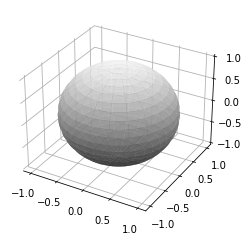

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t = np.linspace(0, np.pi * 2, 100)
s = np.linspace(0, np.pi, 100)

t, s = np.meshgrid(t, s)
x = np.cos(t) * np.sin(s)
y = np.sin(t) * np.sin(s)
z = np.cos(s)
ax = plt.subplot(111, projection='3d')
# ax = plt.subplot(121, projection='3d')
# ax.plot_wireframe(x, y, z)
# ax = plt.subplot(122, projection='3d')
# ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='rainbow')
# ax = plt.subplot(122, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap='gray', alpha=0.7)
plt.show()